In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("SalaryData_Train(1).csv")
test_data=pd.read_csv("SalaryData_Test(1).csv")

In [3]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
train_data= train_data.apply(LabelEncoder().fit_transform)
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [10]:
label_encoder = preprocessing.LabelEncoder()
test_data= test_data.apply(LabelEncoder().fit_transform)
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [13]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,21.435695,13.125521,0.0,11.0,20.0,30.0,71.0
workclass,30161.0,2.199330,0.953940,0.0,2.0,2.0,2.0,6.0
education,30161.0,10.333610,3.812260,0.0,9.0,11.0,12.0,15.0
educationno,30161.0,9.121316,2.550037,0.0,8.0,9.0,12.0,15.0
maritalstatus,30161.0,2.580087,1.498018,0.0,2.0,2.0,4.0,6.0
occupation,30161.0,5.959849,4.029633,0.0,2.0,6.0,9.0,13.0
relationship,30161.0,1.418322,1.601361,0.0,0.0,1.0,3.0,5.0
race,30161.0,3.678592,0.834721,0.0,4.0,4.0,4.0,4.0
sex,30161.0,0.675707,0.468118,0.0,0.0,1.0,1.0,1.0
capitalgain,30161.0,6.552667,23.285175,0.0,0.0,0.0,0.0,117.0


In [14]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,21.767331,13.376938,0.0,11.0,20.0,31.0,72.0
workclass,15060.0,2.214874,0.966422,0.0,2.0,2.0,2.0,6.0
education,15060.0,10.272377,3.826251,0.0,9.0,11.0,12.0,15.0
educationno,15060.0,9.112749,2.558727,0.0,8.0,9.0,12.0,15.0
maritalstatus,15060.0,2.595286,1.505336,0.0,2.0,2.0,4.0,6.0
occupation,15060.0,5.989044,4.020113,0.0,2.0,6.0,9.0,13.0
relationship,15060.0,1.401394,1.588954,0.0,0.0,1.0,3.0,5.0
race,15060.0,3.683665,0.827630,0.0,4.0,4.0,4.0,4.0
sex,15060.0,0.673772,0.468848,0.0,0.0,1.0,1.0,1.0
capitalgain,15060.0,6.003453,21.537847,0.0,0.0,0.0,0.0,109.0


In [15]:
X_train = train_data.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
Y_train = train_data['Salary'].values

In [16]:
X_train

array([[ 22,   5,   9, ...,  24,   0,  39],
       [ 33,   4,   9, ...,   0,   0,  12],
       [ 21,   2,  11, ...,   0,   0,  39],
       ...,
       [ 41,   2,  11, ...,   0,   0,  39],
       [  5,   2,  11, ...,   0,   0,  19],
       [ 35,   3,  11, ..., 107,   0,  39]], dtype=int64)

In [17]:
Y_train

array([0, 0, 0, ..., 0, 0, 1])

In [18]:
X_test = test_data.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
Y_test = test_data['Salary'].values

In [19]:
X_test

array([[ 8,  2,  1, ...,  0,  0, 39],
       [21,  2, 11, ...,  0,  0, 49],
       [11,  1,  7, ...,  0,  0, 39],
       ...,
       [21,  2,  9, ...,  0,  0, 49],
       [27,  2,  9, ..., 73,  0, 39],
       [18,  3,  9, ...,  0,  0, 59]], dtype=int64)

In [20]:
Y_test

array([0, 0, 1, ..., 0, 0, 1])

In [21]:
columns=["age","workclass","education","educationno","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native","Salary"]
number = preprocessing.LabelEncoder()
for i in columns:
    train_data[i] = number.fit_transform(train_data[i])
    test_data[i] = number.fit_transform(test_data[i])

colnames = train_data.columns

In [22]:
train_x = train_data[colnames[0:13]]
train_y = train_data[colnames[13]]
test_x = test_data[colnames[0:13]]
test_y  = test_data[colnames[13]]

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
train_x = norm_func(train_x)
test_x =  norm_func(test_x)

## SVM

In [25]:
#Linear
model_linear = SVC(kernel = "linear")
model_linear.fit(train_x,train_y)
pred_linear = model_linear.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred_linear))

Accuracy: 0.8034528552456839


<AxesSubplot:>

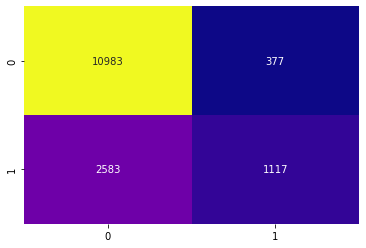

In [26]:
sns.heatmap(confusion_matrix(test_y, pred_linear), annot=True, fmt='d', cmap='plasma', cbar=False)

In [27]:
#Poly
model_poly = SVC(kernel = "poly")
model_poly.fit(train_x,train_y)
pred_poly = model_poly.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred_poly))

Accuracy: 0.8440903054448872


<AxesSubplot:>

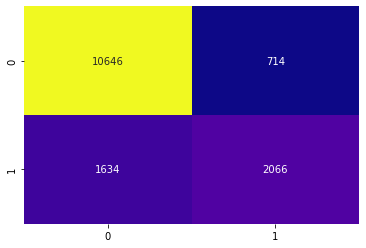

In [28]:
sns.heatmap(confusion_matrix(test_y, pred_poly), annot=True, fmt='d', cmap='plasma', cbar=False)

In [29]:
#RBF
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_x,train_y)
pred_rbf = model_rbf.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred_rbf))

Accuracy: 0.8444223107569722


<AxesSubplot:>

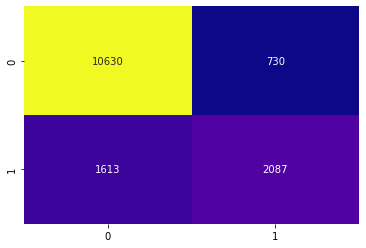

In [30]:
sns.heatmap(confusion_matrix(test_y, pred_rbf), annot=True, fmt='d', cmap='plasma', cbar=False)

In [31]:
#Sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(train_x,train_y)
pred_sigmoid = model_sigmoid.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred_sigmoid))

Accuracy: 0.5822709163346613


<AxesSubplot:>

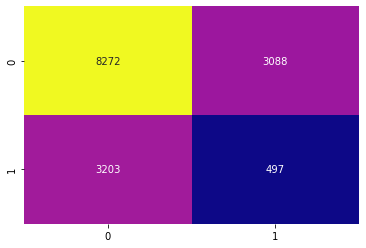

In [32]:
sns.heatmap(confusion_matrix(test_y, pred_sigmoid), annot=True, fmt='d', cmap='plasma', cbar=False)

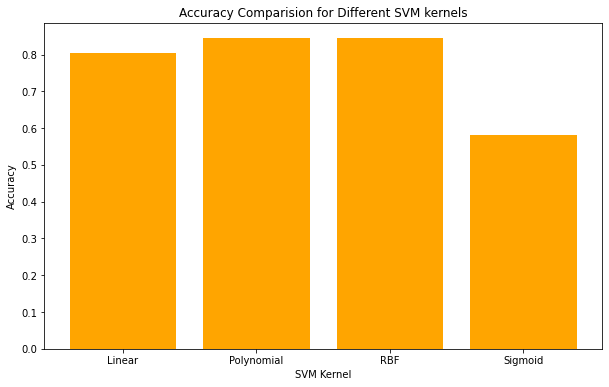

In [33]:
accuracy_linear = accuracy_score(test_y, pred_linear)
accuracy_rbf = accuracy_score(test_y, pred_poly)
accuracy_poly = accuracy_score(test_y, pred_rbf)
accuracy_sigmoid = accuracy_score(test_y, pred_sigmoid)

Kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]

#Bar plot
plt.figure(figsize=(10, 6))
plt.bar(Kernels, accuracies, color='orange')
plt.title('Accuracy Comparision for Different SVM kernels')
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.show()

In [34]:
max_accuracy_kernel = max([('Linear', accuracy_linear), ('RBF', accuracy_rbf), ('Polynomial', accuracy_poly), ('Sigmoid', accuracy_sigmoid)], key=lambda x: x[1])
print(f'\nKernel with the highest accuracy: {max_accuracy_kernel[0]} ({max_accuracy_kernel[1]:.2%})')


Kernel with the highest accuracy: Polynomial (84.44%)
